# Coursera Data Science Capstone Project

Week 5 Assignment - The Battle of Neighbourhoods W2

## 1.Introduction

Capstone project from Coursera course **IBM Data Science Professional Certificate**

We have been task to come up with an idea or problem to solve using the skills and tools learnt during the course to investigate and explore geographical location using the Foursquare API.

### 1.1.The Problem

A new Startup Company is looking to setup an office in Bournemouth, Dorset due to the popularity of the area in the creative and digital sectors.  We are interested in the best location to setup our business by taking into consideration features like transport, leisure, entertainment, shops, living expenses among others.

### 1.1.1.What is the ideal office space?


The company will start small (6-10 people) therefore we will need a space that can accomodate the initial number of employees and has the space to grow/expand when needed in the near future.

If should have a kitchen, a meeting room and bathroom facilities. Data from the 
[flexas.com](https://www.flexas.com/be-en/blog/number-of-square-meters-of-office-space-per-employee#:~:text=1%20meeting%20room%20for%2010%20people%2020%20m2,corridor%20space,%20public%20space,%20kitchen%20and%20other%20areas.) website estimates a size of **72 sq. m.** (775 sq. ft.) so we will be looking at properties with that space as minimum requirement.

It should also have good transport facilities for commute. Gyms, restaurants and cafes around will be a plus.

### 1.2.Background

There has been an increasing popularity of tech companies in the South West of England, Bournemouth in particular is seen as a potential creative, digital cluster because it boasts above average business start-up, with Bournemouth University and the Arts University College of Bournemouth both attracting talented students. [Source](https://technation.techcityuk.com/cluster/bournemouth-and-poole/)

The creative and digital economy accounts for eight per cent of the local GDP already and that figure is growing by 14 per cent a year. [Source](https://apps.geowessex.com/insights/AreaProfiles/PreUnitaryAuthority/bournemouth)

We aim to find a single or a couple of recomendations for the most optimal location for an office by the end of the project.

## 2.Data

### 2.1.Data Sources

Data from different sources will be use to explore and determine the best location(s) with most potential to setup and open an office in the area.

Most of the data has already been collected, **this notebook** details the steps and methods implemented to acquire the data.

### 2.1.1.Rightmove

[rightmove.co.uk](https://www.rightmove.co.uk/commercial-property-to-let/find.html?locationIdentifier=REGION%5E194&propertyTypes=serviced-office%2Coffice&includeLetAgreed=false&mustHave=&dontShow=&furnishTypes=&areaSizeUnit=sqft&priceType=pcm&keywords=) from this site we will grab information about the latest office spaces for rent in the area. Again using similar webscraping techniques I manage to create a dataset that contains the address, rent cost and square footage information for each property, them using GoogleMaps API I complemented the data with its respective geographic coordinates to be able to plot the locations on a map.

View data collection source code [here](#rightmovedata)

### 2.1.2.Foursquare

[foursquare.com](https://foursquare.com/) will be used to explore each office location vecinity to further explore what kind of amenities, transportation facilities or any other feature that will be beneficial to facilitate  locations of interest.

View data collection source code [here](#foursquaredata)

### 2.2.Data Wrangling

In [1]:
import pandas as pd
import numpy as np

### 2.2.1.Office Data

First we will clean the date extracted from the rightmove website that contains the information of available office spaces in Bournemouth

In [2]:
df_offices = pd.read_csv('potential_offices.csv')
df_offices.tail(5)

,id,address,lat,lng,rent,size
93,70455276,"Echo Building 18 , Albert Road, Bournemouth, D...",50.721510,-1.878241,POA,50–80 sq. ft.
94,91282403,"15-17 , Stephens Road ,BH2 6LA",50.723128,-1.882801,£98 pcm,50–80 sq. ft.
95,95494049,"1 St Stephen's Court, St Stephen's Road, Bourn...",50.722988,-1.882427,"£3,833 pcm","2,881 sq. ft."
96,100022672,"Manor Road, Bournemouth, Dorset, BH1",50.721178,-1.854880,£338 pcm,NaN
97,77062008,"Wimborne Road, Kinson, Bournemouth, BH10",50.768867,-1.901953,£375 pcm,NaN


Remove offices that are less than **770 sq. ft.** as that is the **minimum space** required. To do so we need to make the size column a single value feature. 

Values cells that contains a value separated by a dash '-' represent the actual office size on the left and the size of the entire building on the right. Cells that contains only 1 value represent the entire office space available for rent. 

So lets clean the data by removing the right entry from the double values and keep the single values as they are.

In [3]:
# Count the number of NaN values
df_offices.isnull().sum(axis = 0)

id         0
address    0
lat        0
lng        0
rent       0
size       2
dtype: int64

In [4]:
# Drop NaN values
df_offices = df_offices.dropna()
df_offices.tail(5)

,id,address,lat,lng,rent,size
91,91282442,"Platinum House, 23 , Hinton Road ,BH1 2EF",50.719047,-1.873558,£200 pcm,50–80 sq. ft.
92,91282565,"Clarendon Business Centre Clifton House, 10, P...",50.719832,-1.886341,£365 pcm,50–80 sq. ft.
93,70455276,"Echo Building 18 , Albert Road, Bournemouth, D...",50.721510,-1.878241,POA,50–80 sq. ft.
94,91282403,"15-17 , Stephens Road ,BH2 6LA",50.723128,-1.882801,£98 pcm,50–80 sq. ft.
95,95494049,"1 St Stephen's Court, St Stephen's Road, Bourn...",50.722988,-1.882427,"£3,833 pcm","2,881 sq. ft."


In [5]:
# Create a new list to hold the amended size values
new_sqft_values = []

# Loop through the 'size' column and amend the value as previously described
for sqft in df_offices['size']:
    new_val = str(sqft)[:-8].split('–')[0].replace(',','')
    # Add new values to the new list
    new_sqft_values.append(int(new_val))
    # print(new_val)

# Replace the new values
df_offices.drop(['size'], axis=1, inplace=True)
df_offices['size'] = new_sqft_values
df_offices.head()

,id,address,lat,lng,rent,size
0,62770194,"13 Oxford Rd, BH8 8HA Bournemouth, United Kingdom",50.724225,-1.865824,"£1,151 pcm",250
1,83154023,"Fir Vale Road, Bournemouth, Dorset, BH1",50.721864,-1.874077,POA,491
2,85052380,"The Helm, Holdenhurst Road, Bournemouth, Dorse...",50.723514,-1.865190,POA,8417
3,85271110,"Richmond House, Richmond Hill, Bournemouth, BH...",50.721857,-1.877716,POA,1336
4,91282550,"Clarendon Business Centre Clifton House, 10, P...",50.719832,-1.886341,"£2,190 pcm",500


Next lets remove the properties that are smaller than **770 sq. ft.**

In [6]:
MIN_OFFICE_SIZE = 770
indexes_to_drop = df_offices[df_offices['size'] < MIN_OFFICE_SIZE].index
df_offices.drop(indexes_to_drop, inplace=True)
df_offices.shape

(18, 6)

### 2.2.2.Venues Data

In [7]:
df_venues = pd.read_csv('bournemouth_venues.csv')
df_venues.head(5)

,level_0,index,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,0,0,4c9e1438542b224b2925f09f,Bus Stop,Bus Stop,v-1611346322,False,Bournemouth Gardens,Gervis Rd,50.720050,-1.878387,"[{'label': 'display', 'lat': 50.72004991352224...",BH 1 2,GB,Bournemouth,Dorset,United Kingdom,"['Bournemouth Gardens (Gervis Rd)', 'Bournemou...",NaN,NaN
1,1,1,4e282b3fd4c0e361d9db0e87,Bus Stop,Bus Stop,v-1611346322,False,Bourne Avenue,NaN,50.720999,-1.880725,"[{'label': 'display', 'lat': 50.72099925094467...",NaN,GB,Bournemouth,Dorset,United Kingdom,"['Bourne Avenue', 'Bournemouth', 'Dorset']",NaN,NaN
2,2,2,4d7b7ccecf3f3704925d3c40,Bournemouth Sq. Bus Stop,Bus Stop,v-1611346322,False,NaN,NaN,50.719905,-1.878513,"[{'label': 'display', 'lat': 50.71990476870037...",NaN,GB,NaN,NaN,United Kingdom,NaN,NaN,NaN
3,3,3,4cd812e553a7f04d8a6d6116,Bus stop - cranborne house,Bus Stop,v-1611346322,False,NaN,NaN,50.724271,-1.867263,"[{'label': 'display', 'lat': 50.72427056882155...",NaN,GB,Bournemouth,Dorset,United Kingdom,"['Bournemouth', 'Dorset']",NaN,NaN
4,4,4,4da59b0d0cb6d75e29fae504,Cememtery Junction Bus Stop,Bus Stop,v-1611346322,False,NaN,NaN,50.731591,-1.873358,"[{'label': 'display', 'lat': 50.73159058826061...",NaN,GB,Bournemouth,Dorset,United Kingdom,"['Bournemouth', 'Dorset']",NaN,NaN


Lest see the list of all features in the dataset

In [9]:
df_venues.columns

Index(['level_0', 'index', 'id', 'name', 'categories', 'referralId', 'hasPerk',
       'location.address', 'location.crossStreet', 'location.lat',
       'location.lng', 'location.labeledLatLngs', 'location.postalCode',
       'location.cc', 'location.city', 'location.state', 'location.country',
       'location.formattedAddress', 'venuePage.id', 'location.neighborhood'],
      dtype='object')

Some of the features(columns) we don't need for our study, lets keep the ones that will be beneficial instead

In [10]:
df_venues = df_venues[['id', 'name', 'categories', 'location.lat', 'location.lng']]
df_venues.columns

Index(['id', 'name', 'categories', 'location.lat', 'location.lng'], dtype='object')

In [11]:
df_venues.rename(columns={'location.lat':'lat','location.lng':'lng'}, inplace=True)

Since we need to classify the venues based on their category, we need see how many different categories there are

In [12]:
def show_venue_categories():
    """
    Display the number of categories in the dataset

        Parameters: None
        
        Returns: A list of categories
    """
    categories = df_venues['categories'].unique()
    categories.sort()

    print(f'Categories count: {len(categories)}')
    return categories

show_venue_categories()

Categories count: 72


array(['Accessories Store', 'Bar', 'Beer Garden', 'Burger Joint',
       'Bus Line', 'Bus Station', 'Bus Stop', 'Business Service', 'Café',
       'Candy Store', 'Chinese Restaurant', 'Climbing Gym',
       'Cocktail Bar', 'Coffee Shop', 'College Bookstore', 'College Gym',
       'Convenience Store', 'Cosmetics Shop', 'Deli / Bodega', 'Dog Run',
       'English Restaurant', 'Fast Food Restaurant', 'Fish & Chips Shop',
       'Food Service', 'Furniture / Home Store', 'Gastropub', 'Gay Bar',
       'Gift Shop', 'Golf Course', 'Gourmet Shop', 'Grocery Store', 'Gym',
       'Gym / Fitness Center', 'Gym Pool', 'Health & Beauty Service',
       'Hookah Bar', 'Hotel', 'Hotel Bar', 'IT Services',
       'Italian Restaurant', 'Lebanese Restaurant', 'Martial Arts School',
       'Mexican Restaurant', 'Miscellaneous Shop', 'Mobile Phone Shop',
       'Nightclub', 'Noodle House', 'Other Great Outdoors',
       'Outdoors & Recreation', 'Park', 'Parking', 'Pedestrian Plaza',
       'Playground', 'Po

There are too mant different categories to choose from. For our purpose lets generalize all the different categories into a handful of groups

In [13]:
food_category_list = ['Burger Joint','Café','Chinese Restaurant','Coffee Shop','Deli / Bodega','English Restaurant','Fast Food Restaurant','Fish & Chips Shop','Food Service','Hotel Bar','Italian Restaurant','Lebanese Restaurant','Mexican Restaurant','Middle Eastern Restaurant','Noodle House','Polish Restaurant','Portuguese Restaurant','Restaurant','Salad Place','Sandwich Place','Seafood Restaurant','Thai Restaurant','Turkish Restaurant']

shop_category_list = ['Accessories Store','Convenience Store','Cosmetics Shop','Furniture / Home Store','Gift Shop','Grocery Store','IT Services','Miscellaneous Shop','Mobile Phone Shop','Salon / Barbershop','Shop & Service','Sporting Goods Shop','Supermarket']

bar_category_list = ['Bar','Beer Garden','Cocktail Bar','Gastropub','Gay Bar','Hookah Bar','Hotel Bar','Nightclub','Pub','Sports Bar']

gym_category_list = ['Climbing Gym','Gym','Gym / Fitness Center','Gym Pool','Health & Beauty Service','Martial Arts School']

transport_category_list = ['Bus Stop','Bus Station','Parking']

A dictionary will serve well to organize the groups we want to change the categories to, it can be easily updated if needed

In [14]:
grouped_categories = ['Food','Shop','Bar','Gym','Transport']

groups_content = {
    grouped_categories[0]: food_category_list,
    grouped_categories[1]: shop_category_list,
    grouped_categories[2]: bar_category_list,
    grouped_categories[3]: gym_category_list,
    grouped_categories[4]: transport_category_list
}

In [15]:
def merge_categories_to_group(df, group_list, group_type):
    """
        Changes the category column on the DataFrame, loops through the group_list parameter and if it matches then change its values to group_type

        Parameters:
            df: The target DataFrame
            group_list: A list containing the current category
            group_type: A string to replace the old category name
        
        Returns:
            None
    """
    for cat in group_list:
        df.loc[df['categories'] == cat, 'categories'] = group_type

Now we merge all the different caterories to its respective group

In [16]:
for group in groups_content.items():
    group_name = group[0]
    group_list = group[1]
    merge_categories_to_group(df_venues, group_list, group_name)

Some of the categories are not relevant and did not get clasified, these will be purged

In [17]:
df_venues = df_venues[df_venues['categories'].isin(grouped_categories)]

show_venue_categories()

Categories count: 5


array(['Bar', 'Food', 'Gym', 'Shop', 'Transport'], dtype=object)

Final venue dataset ready for the classification model

In [18]:
df_venues.tail(5)

,id,name,categories,lat,lng
222,4f06f6d5e4b0540ca07fbb17,hospice shop,Shop,50.740476,-1.882631
223,4cd81ad08f949eb0922075ae,O2 Shop Winton,Shop,50.740635,-1.879474
224,57e463e3498ecbd83f9e7782,Wistmans Coffee Shop and TeaRoom,Food,50.739945,-1.880014
225,4c79042697028cfaa087d9fe,Branksome Beach Shop,Shop,50.706973,-1.908261
226,4d03d7b90e49721e39746d7f,The Galley Fish n Chip Shop,Food,50.732029,-1.848158


## 3.Methodology

Our main objective is to find the best site to setup an office for our client. Based on our data we will have to determine which areas provide the best facilities to do so. For this purpose we will use a [Density-Based Clustering](https://scikit-learn.org/stable/modules/clustering.html#dbscan) Model or DBSCAN & [SciKit-Learn](https://scikit-learn.org).

**DBSCAN** lets us create regions of high density population, it will allow us to segment all the venues into smaller groups easing the office location process as it will let us clearly visualize/identify which areas are most beneficial.

### 3.1.Density-Based Clustering

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### Feature normalization

The current geolocation values wont be of any good to train the model, to make it work we need to normalize the data first

In [20]:
X = StandardScaler().fit_transform(np.nan_to_num(df_venues[['lat','lng']]))
X[:5]

array([[-0.56206293, -0.06217632],
       [-0.49061224, -0.13440849],
       [-0.57298707, -0.06608671],
       [-0.24440062,  0.28150712],
       [ 0.30653142,  0.0932044 ]])

Fit data **X** to the DBSCAN model

In [21]:
dbs_model = DBSCAN(eps=0.4, min_samples=4).fit(X)

print('Group labels:', set(dbs_model.labels_))

Group labels: {0, 1, 2, 3, 4, -1}


In [320]:
df_venues['group'].value_counts()

 0    129
-1     38
 1     14
 2      9
 4      4
 3      4
Name: group, dtype: int64

Add group labels to the venues dataset

In [22]:
df_venues['group'] = dbs_model.labels_
df_venues.tail()

,id,name,categories,lat,lng,group
222,4f06f6d5e4b0540ca07fbb17,hospice shop,Shop,50.740476,-1.882631,1
223,4cd81ad08f949eb0922075ae,O2 Shop Winton,Shop,50.740635,-1.879474,1
224,57e463e3498ecbd83f9e7782,Wistmans Coffee Shop and TeaRoom,Food,50.739945,-1.880014,1
225,4c79042697028cfaa087d9fe,Branksome Beach Shop,Shop,50.706973,-1.908261,-1
226,4d03d7b90e49721e39746d7f,The Galley Fish n Chip Shop,Food,50.732029,-1.848158,0


#### Visualize Venues on the map

In [113]:
import folium

Color set to visualize the different groups

In [321]:
map_markers = [('Group 1','#360568'),
               ('Group 2','#5B2A86'),
               ('Group 3','#7785AC'),
               ('Group 4','#9AC6C5'),
               ('Group 5','#A5E6BA'),
               ('Offices','#F6AE2D'),
               ('Outliers','#FFF07C')]


In [264]:
def draw_marker(trg_map, lat, lng, color, label):
    """
    Draws a circle on the map at (lat,lng) geo location

        Parameters:
            trg_map: Folium map to draw the markes on to
            lat: Integer latitude coordinate
            lng: Integer latitude coordinate
            label: String to show on the marker popup
            color: Hex color
        Returns: None
    """
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        color = color,
        popup = label,
        weight = 1,
        fill = True,
        fill_color = color,
        fill_opacity = 0.65).add_to(trg_map)

    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        color = False,
        fill = True,
        fill_color = color,
        fill_opacity = 1).add_to(trg_map)

In [322]:
def show_leyend_on_map(trg_map, markers):
    """
    Renders an html leyend box to the map

        Parameters:
            trg_map: Folium target map
            markers: List of tuples with group, colour pairs
        
        Returns: None
    """
    item_txt = ''
    for marker in markers:
        item_txt += """<br><i class="fa fa-circle fa-2x" style="color:{col}"></i>&nbsp; {idx}""".format(idx=marker[0], col=marker[1])
        
    html_itms = item_txt 

    legend_html = """
        <div style="
            background-color: white; position: fixed; 
            padding-top: 5px; padding-left: 10px;
            top: 10px; left: 50px;
            width: 120px; height: 232px; 
            border-radius: 4px;
            filter: drop-shadow(0px 1px 3px grey);
            font-size: 14px; z-index:9999;
        ">
            {title} 
            {itm_txt}
        </div>
        """.format(title="Venue Groups", itm_txt=html_itms)

    trg_map.get_root().html.add_child(folium.Element(legend_html))

In [318]:
def plot_on_map(data, markers, zoom=12, trg_map=None):
    """
    Draws a map with markers,

        Parameters:
            data: DataFrame containing the values to plot on the map
            color_set: List of hex color_set
            zoom: Integer to set the map starting zoom value
            trg_map: Folium map object
            is_grouped: Boolean, checkes if the data has a group feature
            show_leyend: Boolean, to show or hide the leyend
            
        Returns:
            trg_map: Folium map object
    """
    
    fmap = folium.Map(
        location = [50.72039, -1.88092],
        zoom_start = zoom,
        tiles = 'cartodbpositron') if trg_map == None else trg_map
    
    if len(data.index) > 0 :
        for row in data.iterrows():
            lat = row[1]['lat']
            lng = row[1]['lng']
            label = row[1]['name'] if 'name' in data else row[1]['address']
            coli = row[1]['group'] if 'group' in data else -2

            draw_marker(fmap, lat, lng, markers[coli][1], label)
    else:
        print('Not enough data to plot markers on the map')

    return fmap

### Venues Map

Shows the distribution of the different groups

In [319]:
venues_map = plot_on_map(df_venues, map_markers, zoom=12, trg_map=None)
venues_map

### Offices Map

Shows office locations

In [313]:
offices_map = plot_on_map(df_offices, map_markers, zoom=14, trg_map=venues_map)
show_leyend_on_map(offices_map, map_markers)
offices_map

From the map we can see that the mayority of offices are located in Group 0, lets explore that group to narrow down our options

In [304]:
df_venues_group0 = df_venues.loc[df_venues['group'] == 0]
df_venues_group0.drop(columns=['group'], inplace=True)

In [305]:
vg0_fmap = folium.Map(
    location = [50.72039, -1.88092],
    zoom_start = 14,
    tiles = 'cartodbpositron')

In [306]:
X0 = StandardScaler().fit_transform(np.nan_to_num(df_venues_group0[['lat','lng']]))

In [307]:
dbs_model0 = DBSCAN(eps=0.2, min_samples=4).fit(X0)

print('Group labels:', set(dbs_model0.labels_))

Group labels: {0, 1, 2, 3, -1}


In [308]:
df_venues_group0['group'] = dbs_model0.labels_
df_venues_group0.head(5)

,id,name,categories,lat,lng,group
0,4c9e1438542b224b2925f09f,Bus Stop,Transport,50.720050,-1.878387,0
1,4e282b3fd4c0e361d9db0e87,Bus Stop,Transport,50.720999,-1.880725,0
2,4d7b7ccecf3f3704925d3c40,Bournemouth Sq. Bus Stop,Transport,50.719905,-1.878513,0
3,4cd812e553a7f04d8a6d6116,Bus stop - cranborne house,Transport,50.724271,-1.867263,-1
5,4dffa7b4a809baedbd923d16,Centre Bus Stop,Transport,50.719790,-1.878425,0


In [309]:
venues_group0_map =  plot_on_map(df_venues_group0, map_markers, zoom=15, trg_map=None)
venues_group0_map

Render offices location data on the map

In [314]:
offices_map = plot_on_map(df_offices, map_markers, zoom=16, trg_map=venues_group0_map)
show_leyend_on_map(offices_map, map_markers)
offices_map

From this map we can see which offices are near the most dense areas, especially the ones in the first Group

## 4.Results

From our exploratory data analysis we can see the offices that are closer to more facilities, we manage to segment the area to help visualize which location will be more appropiate to setup an office.

### 4.1. Groups Analysis

Lets explore a bit more each of the groups that have more density to see how they are relevant in our choice making process.

In [348]:
import matplotlib.pyplot as plt

In [357]:
def plot_barh_chart(df, idx):
    labels = df['categories'].unique()
    values = df['categories'].value_counts()
    plt.barh(labels, values, color=['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500'])
    plt.title(f'Group {idx}: {df.shape[0]} venues')
    plt.show()

In [349]:
df_group1 = df_venues_group0.loc[df_venues_group0['group'] == 0]
df_group2 = df_venues_group0.loc[df_venues_group0['group'] == 1]

**Venues distribution per group**

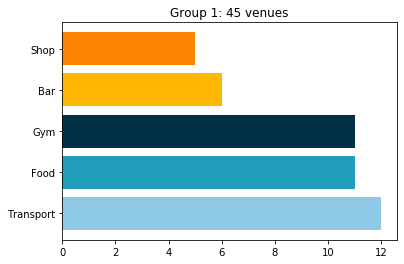

In [358]:
plot_barh_chart(df_group1, 1)

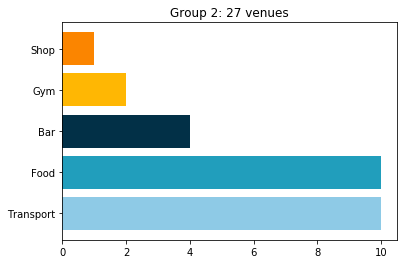

In [359]:
plot_barh_chart(df_group2, 2)

From these charts is clear that Group 1 has more to offer in terms of transportation, restaurants and gyms as well as entertainment and other shop options.

## 5.Discussion

We manage to show potential locations for an office that match the minimum size requirement, as well as show what other facilities are available around the different locations. All this information together helps to narrow down locations of best interest.

Group 1 has more to offer since it is in the center of the town, but rent prices may be higher than the others located in Group 2 which offers a good range of facilities as well.

From our results we got 2 potential groups (Group 1 and Group 2). This segmentation has reveal enough information of the surroundings to further assis to select which location is more suitable to our Client.

## 6.Conclusion

DBSCAN has allowed us to easily segment all the possible locations into a small set of groups. This has enabled us to confidently select the best groups to narrow down the search for an office that meet our clients requirements.

I hope this report has facilitate our Client's desicion making based on our results.